In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Destinee getting data
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/applied_regression/bike20_23.csv"
dem = pd.read_csv(file_path)

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/citibike/bike20_23.csv"
dem = pd.read_csv(file_path)

In [ ]:
bike20_23=dem.copy()

In [ ]:
bike20_23.head()

In [ ]:
# aggregate the data to each day
bike20_23['started_at'] = pd.to_datetime(bike20_23['started_at'])
aggregated_data = bike20_23.groupby(bike20_23['started_at'].dt.date)['trip_id'].sum().reset_index()
print(aggregated_data.shape)
print(aggregated_data.head())

(1308, 2)
   started_at  trip_id
0  2020-01-01    18114
1  2020-01-02    41556
2  2020-01-03    31873
3  2020-01-04    29436
4  2020-01-05    27589


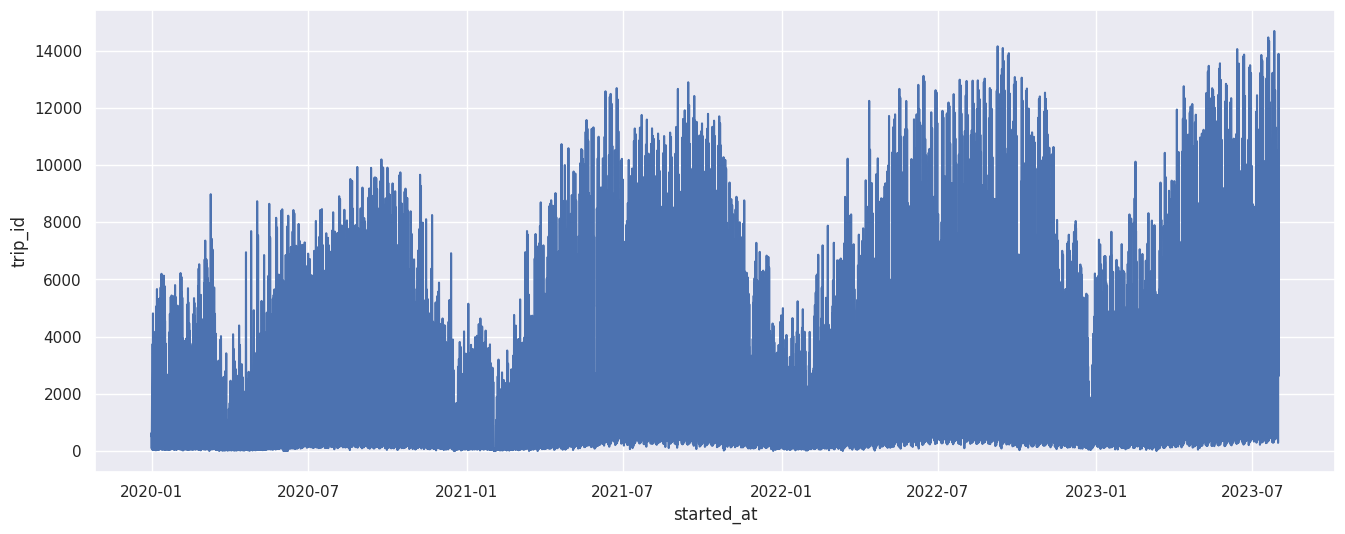

In [ ]:
# see the general trend
sns.set(rc={'figure.figsize':(16, 6)})
sns.lineplot(data = bike20_23, x = 'started_at', y = 'trip_id')
plt.show()

In [ ]:
# create a list of weekday
weekday = []
for i in aggregated_data['started_at']:
  week = pd.Timestamp(i).weekday()
  weekday.append(week)

In [ ]:
aggregated_data['Weekday'] = weekday
aggregated_data['started_at'] = pd.to_datetime(aggregated_data['started_at'])
#weekday: monday/ month
aggregated_data.head(n = 5)

,started_at,trip_id,Weekday
0,2020-01-01,18114,2
1,2020-01-02,41556,3
2,2020-01-03,31873,4
3,2020-01-04,29436,5
4,2020-01-05,27589,6


In [ ]:
import holidays
# Specify the country for which we want to find holidays
us_holidays = holidays.US()

# Create a new column 'Holiday' and use a lambda function to check if each date is a holiday
aggregated_data['Holiday'] = aggregated_data['started_at'].apply(lambda x: x in us_holidays).astype(int)

In [ ]:
# Transform Dates
aggregated_data['Year'] = aggregated_data['started_at'].dt.year
aggregated_data['DayOfYearSin'] = aggregated_data['started_at'].dt.dayofyear.apply(lambda x: np.sin(2 * np.pi * x / 365))
aggregated_data['DayOfYearCos'] = aggregated_data['started_at'].dt.dayofyear.apply(lambda x: np.cos(2 * np.pi * x / 365))
aggregated_data['Month'] = aggregated_data['started_at'].dt.month
aggregated_data['DayOfWeekSin'] = aggregated_data['started_at'].dt.dayofweek.apply(lambda x: np.sin(2 * np.pi * x / 7))
aggregated_data['DayOfWeekCos'] = aggregated_data['started_at'].dt.dayofweek.apply(lambda x: np.cos(2 * np.pi * x / 7))
aggregated_data['IsWeekend'] = (aggregated_data['Weekday'] >= 5).astype(int)

In [ ]:
# rename column started_at to DATE
aggregated_data.rename(columns = {'started_at': 'DATE'}, inplace = True)

In [ ]:
aggregated_data

,DATE,trip_id,Weekday,Holiday,Year,DayOfYearSin,DayOfYearCos,Month,DayOfWeekSin,DayOfWeekCos,IsWeekend
0,2020-01-01,18114,2,1,2020,0.017213,0.999852,1,0.974928,-0.222521,0
1,2020-01-02,41556,3,0,2020,0.034422,0.999407,1,0.433884,-0.900969,0
2,2020-01-03,31873,4,0,2020,0.051620,0.998667,1,-0.433884,-0.900969,0
3,2020-01-04,29436,5,0,2020,0.068802,0.997630,1,-0.974928,-0.222521,1
4,2020-01-05,27589,6,0,2020,0.085965,0.996298,1,-0.781831,0.623490,1
...,...,...,...,...,...,...,...,...,...,...,...
1303,2023-07-27,132352,3,0,2023,-0.425000,-0.905193,7,0.433884,-0.900969,0
1304,2023-07-28,129631,4,0,2023,-0.440519,-0.897743,7,-0.433884,-0.900969,0
1305,2023-07-29,123905,5,0,2023,-0.455907,-0.890028,7,-0.974928,-0.222521,1
1306,2023-07-30,132718,6,0,2023,-0.471160,-0.882048,7,-0.781831,0.623490,1


In [ ]:
# check null_value
aggregated_data.isnull().sum()

DATE            0
trip_id         0
Weekday         0
Holiday         0
Year            0
DayOfYearSin    0
DayOfYearCos    0
Month           0
DayOfWeekSin    0
DayOfWeekCos    0
IsWeekend       0
dtype: int64

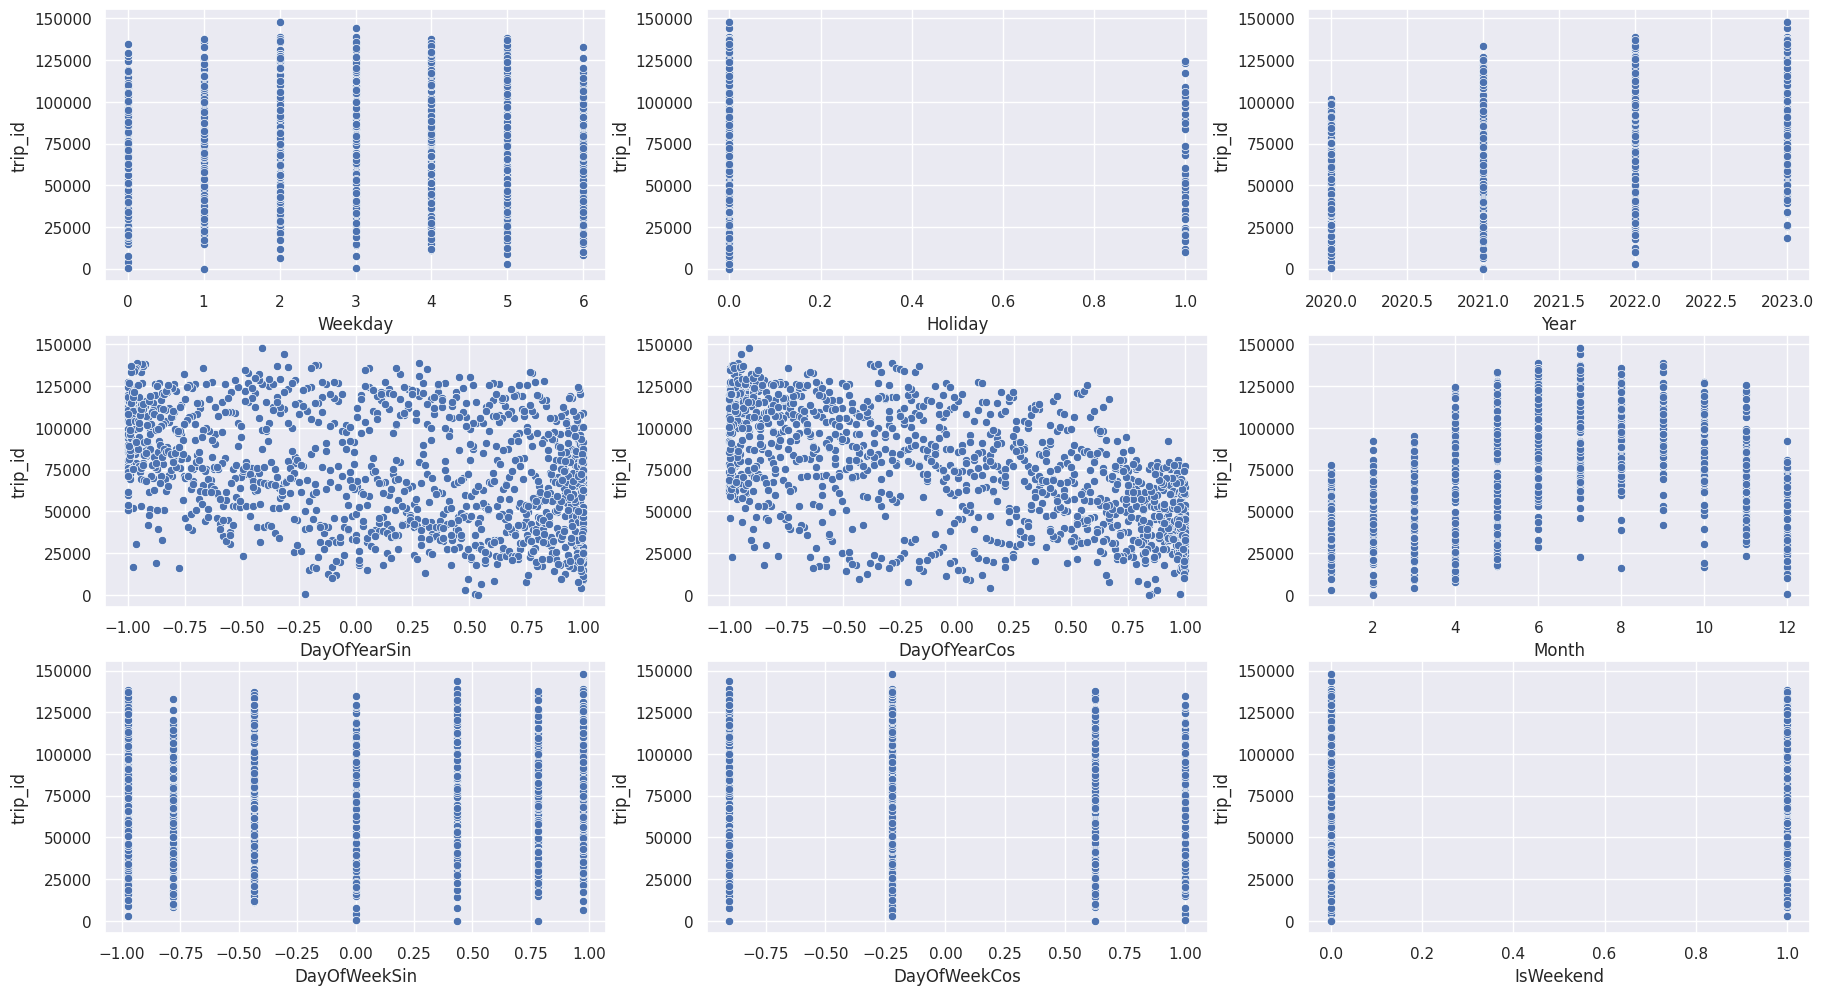

In [ ]:
# draw the scatterplots between predictive variables and trip_id
features = ['Weekday', 'Holiday', 'Year', 'DayOfYearSin', 'DayOfYearCos', 'Month', 'DayOfWeekSin', 'DayOfWeekCos', 'IsWeekend']
target = aggregated_data['trip_id']
sub_df = aggregated_data[features]

fig, ax = plt.subplots(3, 3, figsize = (22, 12))

for var, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x = var, y = target, data = sub_df, ax = subplot)

In [ ]:
corr_data = aggregated_data.drop(columns = ['DATE'])
corr_data.head()

,trip_id,Weekday,Holiday,Year,DayOfYearSin,DayOfYearCos,Month,DayOfWeekSin,DayOfWeekCos,IsWeekend
0,18114,2,1,2020,0.017213,0.999852,1,0.974928,-0.222521,0
1,41556,3,0,2020,0.034422,0.999407,1,0.433884,-0.900969,0
2,31873,4,0,2020,0.051620,0.998667,1,-0.433884,-0.900969,0
3,29436,5,0,2020,0.068802,0.997630,1,-0.974928,-0.222521,1
4,27589,6,0,2020,0.085965,0.996298,1,-0.781831,0.623490,1


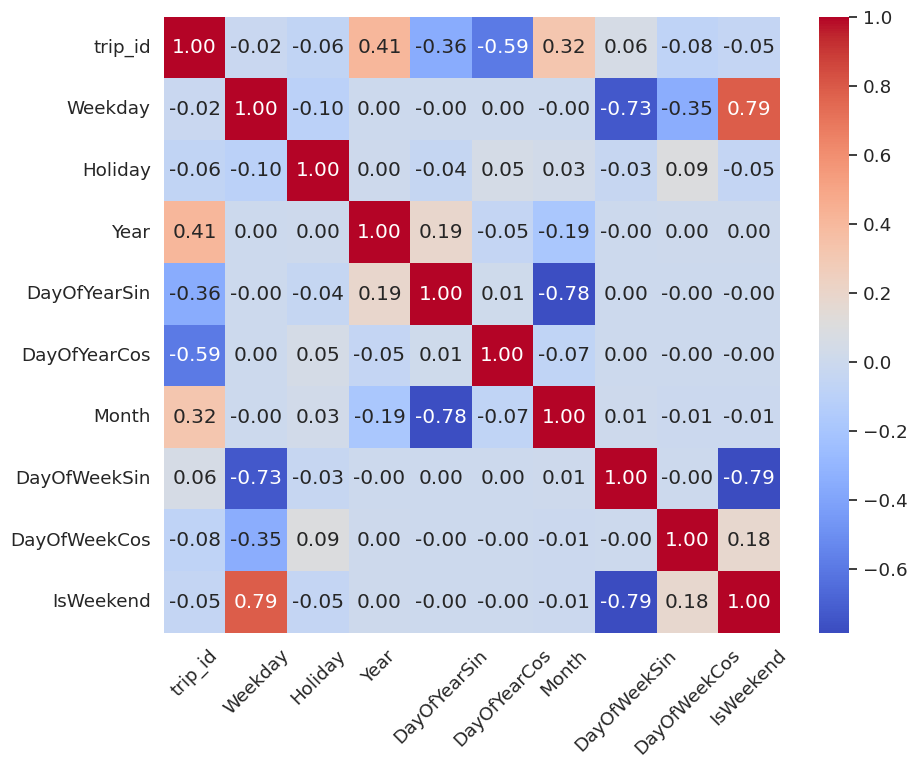

In [ ]:
# correlation matrix
correlation_matrix = np.corrcoef(corr_data, rowvar=False)
column_names = corr_data.columns

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

# Customize the x and y tick labels
heatmap.set_xticklabels(column_names, rotation=45)
heatmap.set_yticklabels(column_names, rotation=0)

plt.show()

In [ ]:
#Destinee getting data
save_path = "/content/drive/MyDrive/applied_regression/aggregated_data.csv"
aggregated_data.to_csv(save_path, index=False)

In [ ]:
save_path = "/content/drive/MyDrive/data_citibike/aggregated_data.csv"
aggregated_data.to_csv(save_path, index=False)

OSError: ignored

#Full Model

In [ ]:
# build full model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print(aggregated_data.describe())

             trip_id      Weekday      Holiday         Year  DayOfYearSin  \
count    1308.000000  1308.000000  1308.000000  1308.000000   1308.000000   
mean    74488.855505     3.001529     0.035168  2021.323394      0.083046   
std     33507.207503     2.000764     0.184275     1.050450      0.695519   
min         0.000000     0.000000     0.000000  2020.000000     -0.999991   
25%     46080.500000     1.000000     0.000000  2020.000000     -0.589521   
50%     74061.500000     3.000000     0.000000  2021.000000      0.162807   
75%    103966.250000     5.000000     0.000000  2022.000000      0.763889   
max    148050.000000     6.000000     1.000000  2023.000000      0.999991   

       DayOfYearCos        Month  DayOfWeekSin  DayOfWeekCos    IsWeekend  
count   1308.000000  1308.000000   1308.000000   1308.000000  1308.000000  
mean      -0.021548     6.116208     -0.000598     -0.000477     0.285933  
std        0.713899     3.387986      0.707317      0.707437     0.452030  
mi

In [ ]:
# Step 2: Linear Regression
X = aggregated_data[['Year', 'DayOfYearSin', 'DayOfYearCos', 'Month', 'DayOfWeekSin', 'DayOfWeekCos', 'Holiday', 'IsWeekend','Weekday']]
y = aggregated_data['trip_id']

# scaler data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

Mean Squared Error: 299476933.88479245
R-squared: 0.7268640900950263


In [ ]:
X

,Year,DayOfYearSin,DayOfYearCos,Month,DayOfWeekSin,DayOfWeekCos,Holiday,IsWeekend,Weekday
0,2020,0.017213,0.999852,1,0.974928,-0.222521,1,0,2
1,2020,0.034422,0.999407,1,0.433884,-0.900969,0,0,3
2,2020,0.051620,0.998667,1,-0.433884,-0.900969,0,0,4
3,2020,0.068802,0.997630,1,-0.974928,-0.222521,0,1,5
4,2020,0.085965,0.996298,1,-0.781831,0.623490,0,1,6
...,...,...,...,...,...,...,...,...,...
1303,2023,-0.425000,-0.905193,7,0.433884,-0.900969,0,0,3
1304,2023,-0.440519,-0.897743,7,-0.433884,-0.900969,0,0,4
1305,2023,-0.455907,-0.890028,7,-0.974928,-0.222521,0,1,5
1306,2023,-0.471160,-0.882048,7,-0.781831,0.623490,0,1,6


In [ ]:
y_pred1 = model.predict(X_standard)

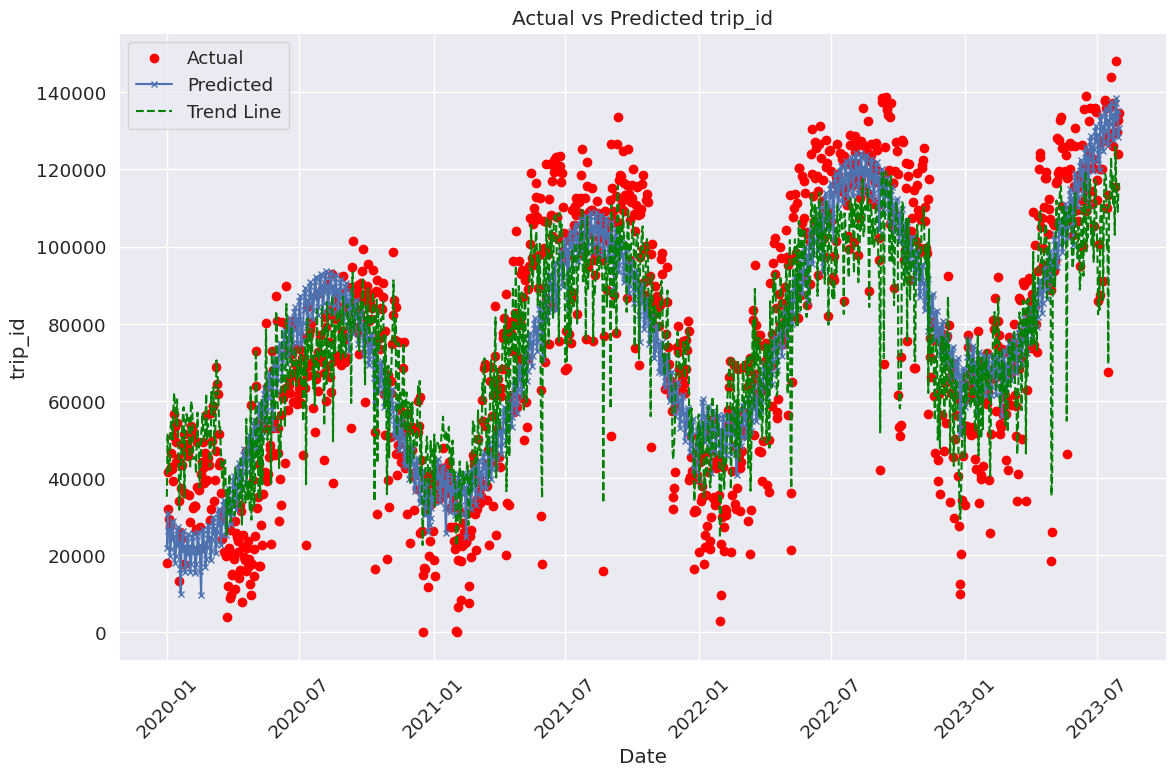

In [ ]:
# Fit linear regression to actual and predicted values
reg = LinearRegression()
reg.fit(y.values.reshape(-1, 1), y_pred1)

# Generate trend line values
trend_line = reg.predict(y.values.reshape(-1, 1))
dates = aggregated_data['DATE']
# Plot the data with trend line
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
plt.scatter(dates, y, label='Actual', color = "red")
plt.plot(dates, y_pred1, label='Predicted', marker='x', markersize=4)
plt.plot(dates, trend_line, label='Trend Line', linestyle='--', color='green')
plt.grid(True)

# Add title and labels
plt.title('Actual vs Predicted trip_id')
plt.xlabel('Date')
plt.ylabel('trip_id')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# show p-value
import statsmodels.api as sm

x = sm.add_constant(X_standard)
result = sm.OLS(y, x).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                trip_id   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     328.7
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:07:57   Log-Likelihood:                -14708.
No. Observations:                1308   AIC:                         2.944e+04
Df Residuals:                    1298   BIC:                         2.949e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.449e+04    513.412    145.086      0.0

In [ ]:
# Since the p-value of variable IsWeekend is larger than 0.05, we decided to drop it
# In addition, based on the heat map, we also decided to drop "Weekday and "DayOfYearSin"/"Month"

Since the p-value of variable IsWeekend is larger than 0.05, we decided to drop it.
In addition, based on the heat map, we also decided to drop "Weekday and "Month"

#Model Without "Month"

In [ ]:
# model without "Month"
# Linear Regression
X2 = aggregated_data[['Year', 'DayOfYearSin', 'DayOfYearCos', 'DayOfWeekSin', 'DayOfWeekCos', 'Holiday']]
y2 = aggregated_data['trip_id']

# scaler data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X2_standard = scaler.fit_transform(X2)

# Split data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_standard, y2, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

# Predict on the test set
y_pred2 = model2.predict(X_test2)

# Calculate Mean Squared Error
mse2 = mean_squared_error(y_test2, y_pred2)
print(f'Mean Squared Error: {mse2}')

# Calculate R-squared
r_squared2 = r2_score(y_test2, y_pred2)

print(f'R-squared: {r_squared2}')

Mean Squared Error: 302321857.09718597
R-squared: 0.7242693971410581


In [ ]:
X2

,Year,DayOfYearSin,DayOfYearCos,DayOfWeekSin,DayOfWeekCos,Holiday
0,2020,0.017213,0.999852,0.974928,-0.222521,1
1,2020,0.034422,0.999407,0.433884,-0.900969,0
2,2020,0.051620,0.998667,-0.433884,-0.900969,0
3,2020,0.068802,0.997630,-0.974928,-0.222521,0
4,2020,0.085965,0.996298,-0.781831,0.623490,0
...,...,...,...,...,...,...
1303,2023,-0.425000,-0.905193,0.433884,-0.900969,0
1304,2023,-0.440519,-0.897743,-0.433884,-0.900969,0
1305,2023,-0.455907,-0.890028,-0.974928,-0.222521,0
1306,2023,-0.471160,-0.882048,-0.781831,0.623490,0


In [ ]:
# show p-value

x2 = sm.add_constant(X2_standard)
result1 = sm.OLS(y2, x2).fit()

print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                trip_id   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     487.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:07:57   Log-Likelihood:                -14714.
No. Observations:                1308   AIC:                         2.944e+04
Df Residuals:                    1301   BIC:                         2.948e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.449e+04    515.202    144.582      0.0

The adjusted R-squared doesn't change a lot after dropping the variable IsWeekend, Month and Weekday. Thus, we decided to keep the third model.

In [ ]:
y_pred_drop = model2.predict(X2_standard)

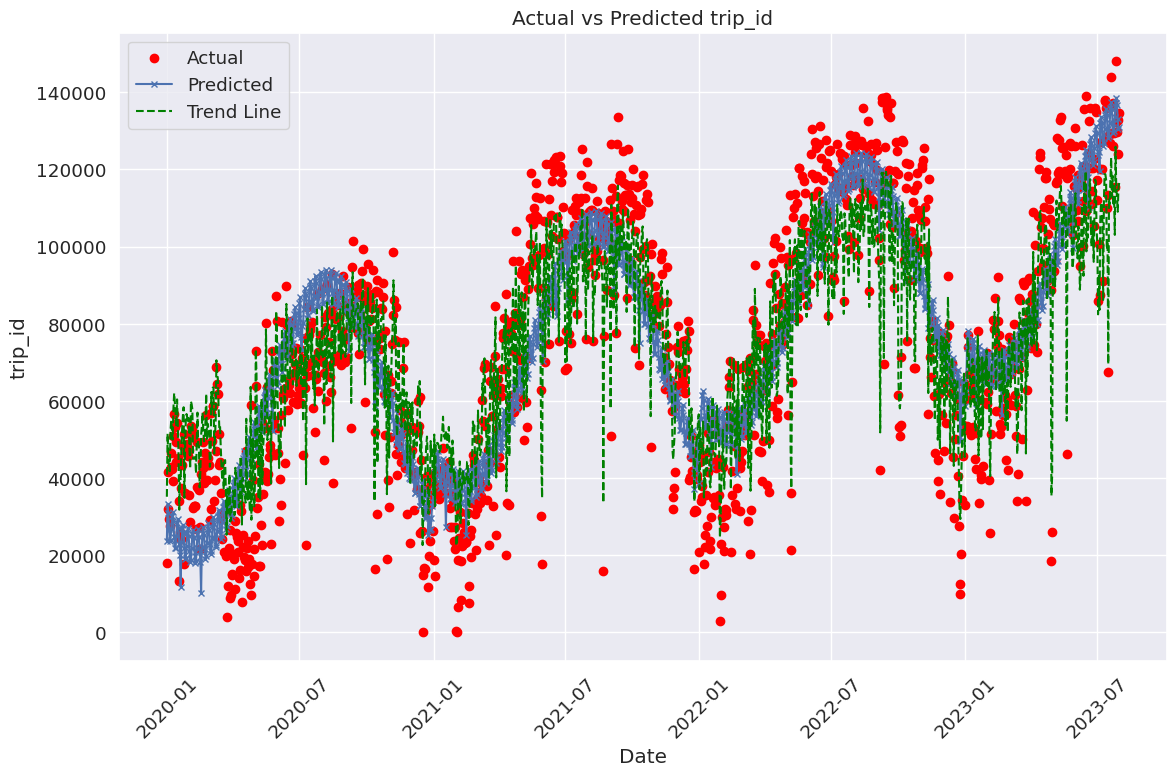

In [ ]:
# Fit linear regression to actual and predicted values
reg_drop = LinearRegression()
reg_drop.fit(y2.values.reshape(-1, 1), y_pred_drop)

# Generate trend line values
trend_line = reg.predict(y.values.reshape(-1, 1))
dates = aggregated_data['DATE']
# Plot the data with trend line
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
plt.scatter(dates, y2, label='Actual', color = "red")
plt.plot(dates, y_pred_drop, label='Predicted', marker='x', markersize=4)
plt.plot(dates, trend_line, label='Trend Line', linestyle='--', color='green')
plt.grid(True)

# Add title and labels
plt.title('Actual vs Predicted trip_id')
plt.xlabel('Date')
plt.ylabel('trip_id')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
new_data = aggregated_data.drop(columns = ['IsWeekend', 'Month', 'Weekday'])

#Add Weather Data

Then, we add the weather variable inside the current model.

In [ ]:
#Destinee getting data
w_data = pd.read_excel("/content/drive/MyDrive/applied_regression/weather_data.xlsm")

In [ ]:
# get weather data
w_data = pd.read_excel("/content/drive/MyDrive/citibike/weather_data.xlsm")

In [ ]:
w_data.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,SNOW,SNWD,TMAX,...,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08
0,USW00094728,2020-01-01,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",0,0,0.0,50,...,260.0,76.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094728,2020-01-02,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",0,0,0.0,94,...,220.0,58.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094728,2020-01-03,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",38,0,0.0,94,...,230.0,45.0,67.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
3,USW00094728,2020-01-04,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",69,0,0.0,106,...,330.0,67.0,107.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00094728,2020-01-05,40.77898,-73.96925,42.7,"NY CITY CENTRAL PARK, NY US",0,0,0.0,56,...,300.0,112.0,192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# choose the available and proper variable
weather_variable = w_data[['DATE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'AWND', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT03', 'WT08']]

In [ ]:
weather_variable

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT03,WT08
0,2020-01-01,0,0,0.0,50,11,38.0,270.0,260.0,76.0,130.0,NaN,NaN,NaN
1,2020-01-02,0,0,0.0,94,6,24.0,230.0,220.0,58.0,98.0,NaN,NaN,NaN
2,2020-01-03,38,0,0.0,94,67,15.0,250.0,230.0,45.0,67.0,1.0,NaN,1.0
3,2020-01-04,69,0,0.0,106,50,20.0,300.0,330.0,67.0,107.0,1.0,NaN,NaN
4,2020-01-05,0,0,0.0,56,17,51.0,300.0,300.0,112.0,192.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,2023-09-27,0,0,0.0,178,100,31.0,60.0,50.0,81.0,116.0,NaN,NaN,NaN
1366,2023-09-28,97,0,0.0,183,133,29.0,60.0,40.0,63.0,94.0,1.0,NaN,NaN
1367,2023-09-29,1392,0,0.0,172,150,36.0,80.0,60.0,76.0,130.0,1.0,1.0,NaN
1368,2023-09-30,10,0,0.0,189,139,23.0,30.0,20.0,58.0,81.0,1.0,NaN,1.0


In [ ]:
# rename the date column
new_data.rename(columns={'started_at': 'DATE'}, inplace = True)

In [ ]:
# combine calendar and weather data together
new_data = new_data.merge(weather_variable, on = 'DATE', how = 'left')

In [ ]:
# check null value
new_data.isnull().sum()

DATE               0
trip_id            0
Holiday            0
Year               0
DayOfYearSin       0
DayOfYearCos       0
DayOfWeekSin       0
DayOfWeekCos       0
PRCP               0
SNOW               0
SNWD               1
TMAX               0
TMIN               0
AWND              56
WDF2              55
WDF5              67
WSF2              55
WSF5              67
WT01             795
WT03            1204
WT08            1107
dtype: int64

In [ ]:
# replace null value in SNWD, AWND, WDF2, WDF5, WSF2, WSF5 with average value
def replace_null(col):
  average_value = new_data[col].mean()
  new_data[col].fillna(average_value, inplace = True)

null_variables = ['SNWD', 'AWND', 'WDF2', 'WDF5', 'WSF2', 'WSF5']

for col in null_variables:
  replace_null(col)

In [ ]:
# replace null value in WT01, WT03, WT08 with 0
new_data['WT01'].fillna(0, inplace = True)
new_data['WT03'].fillna(0, inplace = True)
new_data['WT08'].fillna(0, inplace = True)

In [ ]:
new_data.isnull().sum()

DATE            0
trip_id         0
Holiday         0
Year            0
DayOfYearSin    0
DayOfYearCos    0
DayOfWeekSin    0
DayOfWeekCos    0
PRCP            0
SNOW            0
SNWD            0
TMAX            0
TMIN            0
AWND            0
WDF2            0
WDF5            0
WSF2            0
WSF5            0
WT01            0
WT03            0
WT08            0
dtype: int64

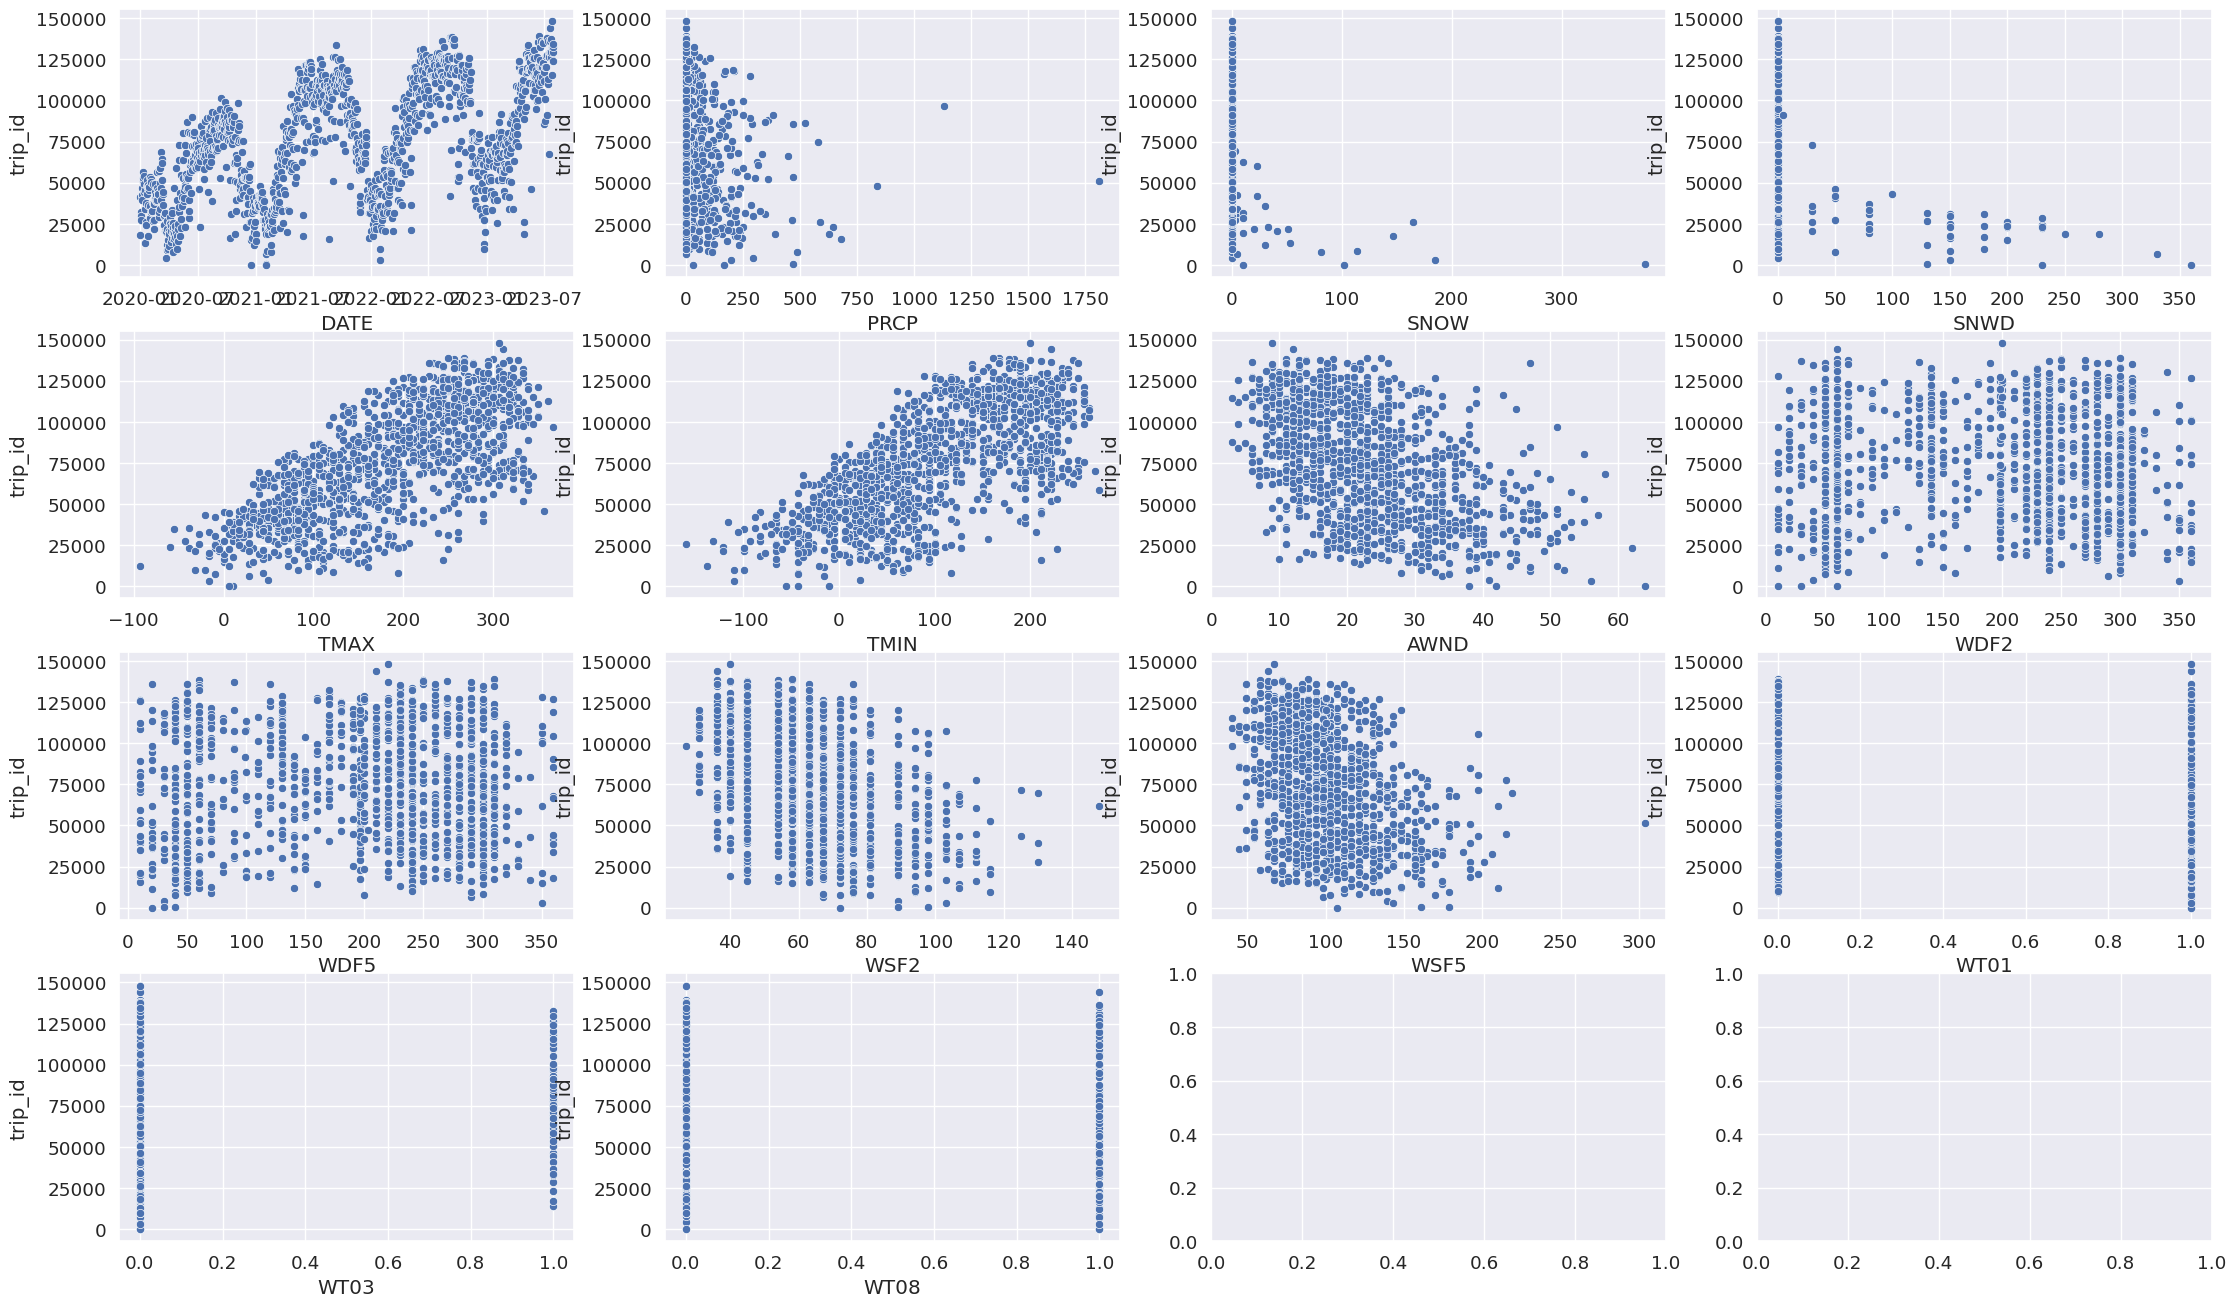

In [ ]:
# draw the scatterplots between weather variables and trip_id
features = weather_variable.columns
target = new_data['trip_id']
sub_df = new_data[features]

fig, ax = plt.subplots(4, 4, figsize = (27, 16))

for var, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x = var, y = target, data = sub_df, ax = subplot)

In [ ]:
# turn WT01, WT03 and WT08 as categorical variables
#new_data['WT01'] = new_data['WT01'].astype('category')
#new_data['WT03'] = new_data['WT03'].astype('category')
#new_data['WT08'] = new_data['WT08'].astype('category')

In [ ]:
# transform variables PRCP, SNOW and SNWD with log1p
import numpy as np

new_data['PRCP'] = np.log1p(new_data['PRCP'])
new_data['SNOW'] = np.log1p(new_data['SNOW'])
new_data['SNWD'] = np.log1p(new_data['SNWD'])

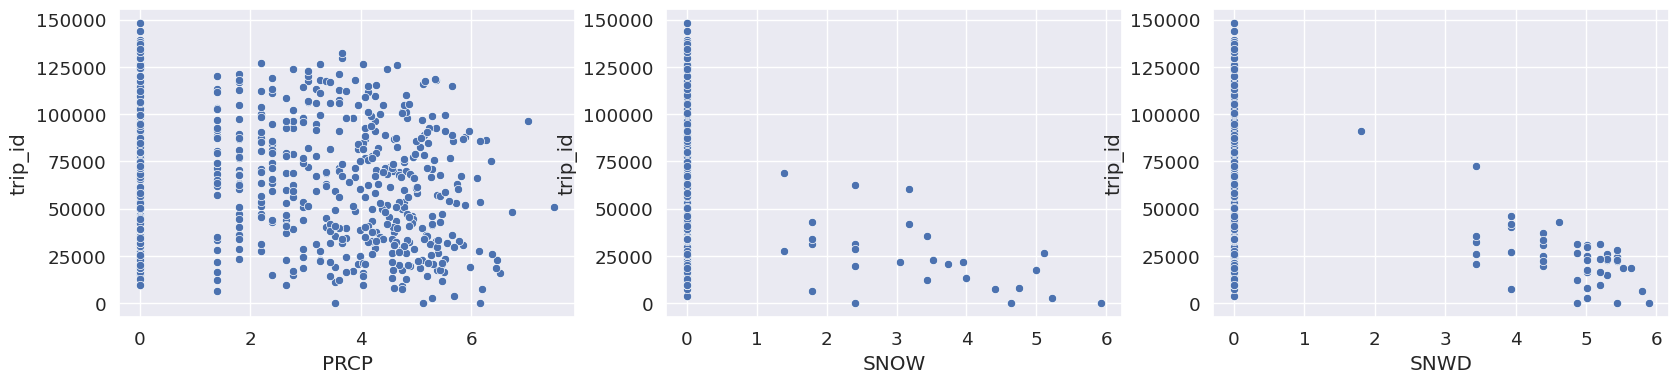

In [ ]:
features1 = ['PRCP', 'SNOW', 'SNWD']
target1 = new_data['trip_id']
sub_df1 = new_data[features1]

fig, ax = plt.subplots(1, 3, figsize = (20, 4))

for var, subplot in zip(features1, ax.flatten()):
    sns.scatterplot(x = var, y = target1, data = sub_df1, ax = subplot)

In [ ]:
new_data.describe()

,trip_id,Holiday,Year,DayOfYearSin,DayOfYearCos,DayOfWeekSin,DayOfWeekCos,PRCP,SNOW,SNWD,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT03,WT08
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.00000
mean,74488.855505,0.035168,2021.323394,0.083046,-0.021548,-0.000598,-0.000477,1.330032,0.067627,0.169207,178.090979,99.196483,22.957668,198.339984,196.439162,62.975259,100.531829,0.392202,0.079511,0.15367
std,33507.207503,0.184275,1.050450,0.695519,0.713899,0.707317,0.707437,1.977456,0.500539,0.889894,95.570778,88.147137,10.372436,98.433589,94.922655,18.330224,30.647002,0.488428,0.270638,0.36077
min,0.000000,0.000000,2020.000000,-0.999991,-0.999963,-0.974928,-0.900969,0.000000,0.000000,0.000000,-93.000000,-160.000000,3.000000,10.000000,10.000000,27.000000,40.000000,0.000000,0.000000,0.00000
25%,46080.500000,0.000000,2020.000000,-0.589521,-0.744104,-0.781831,-0.900969,0.000000,0.000000,0.000000,100.000000,31.750000,15.000000,100.000000,130.000000,54.000000,81.000000,0.000000,0.000000,0.00000
50%,74061.500000,0.000000,2021.000000,0.162807,-0.030120,0.000000,-0.222521,0.000000,0.000000,0.000000,183.000000,94.000000,22.000000,230.000000,220.000000,62.975259,98.000000,0.000000,0.000000,0.00000
75%,103966.250000,0.000000,2022.000000,0.763889,0.690173,0.781831,0.623490,2.944439,0.000000,0.000000,261.000000,178.000000,29.000000,280.000000,280.000000,72.000000,116.000000,1.000000,0.000000,0.00000
max,148050.000000,1.000000,2023.000000,0.999991,1.000000,0.974928,1.000000,7.502186,5.932245,5.888878,367.000000,272.000000,64.000000,360.000000,360.000000,148.000000,304.000000,1.000000,1.000000,1.00000


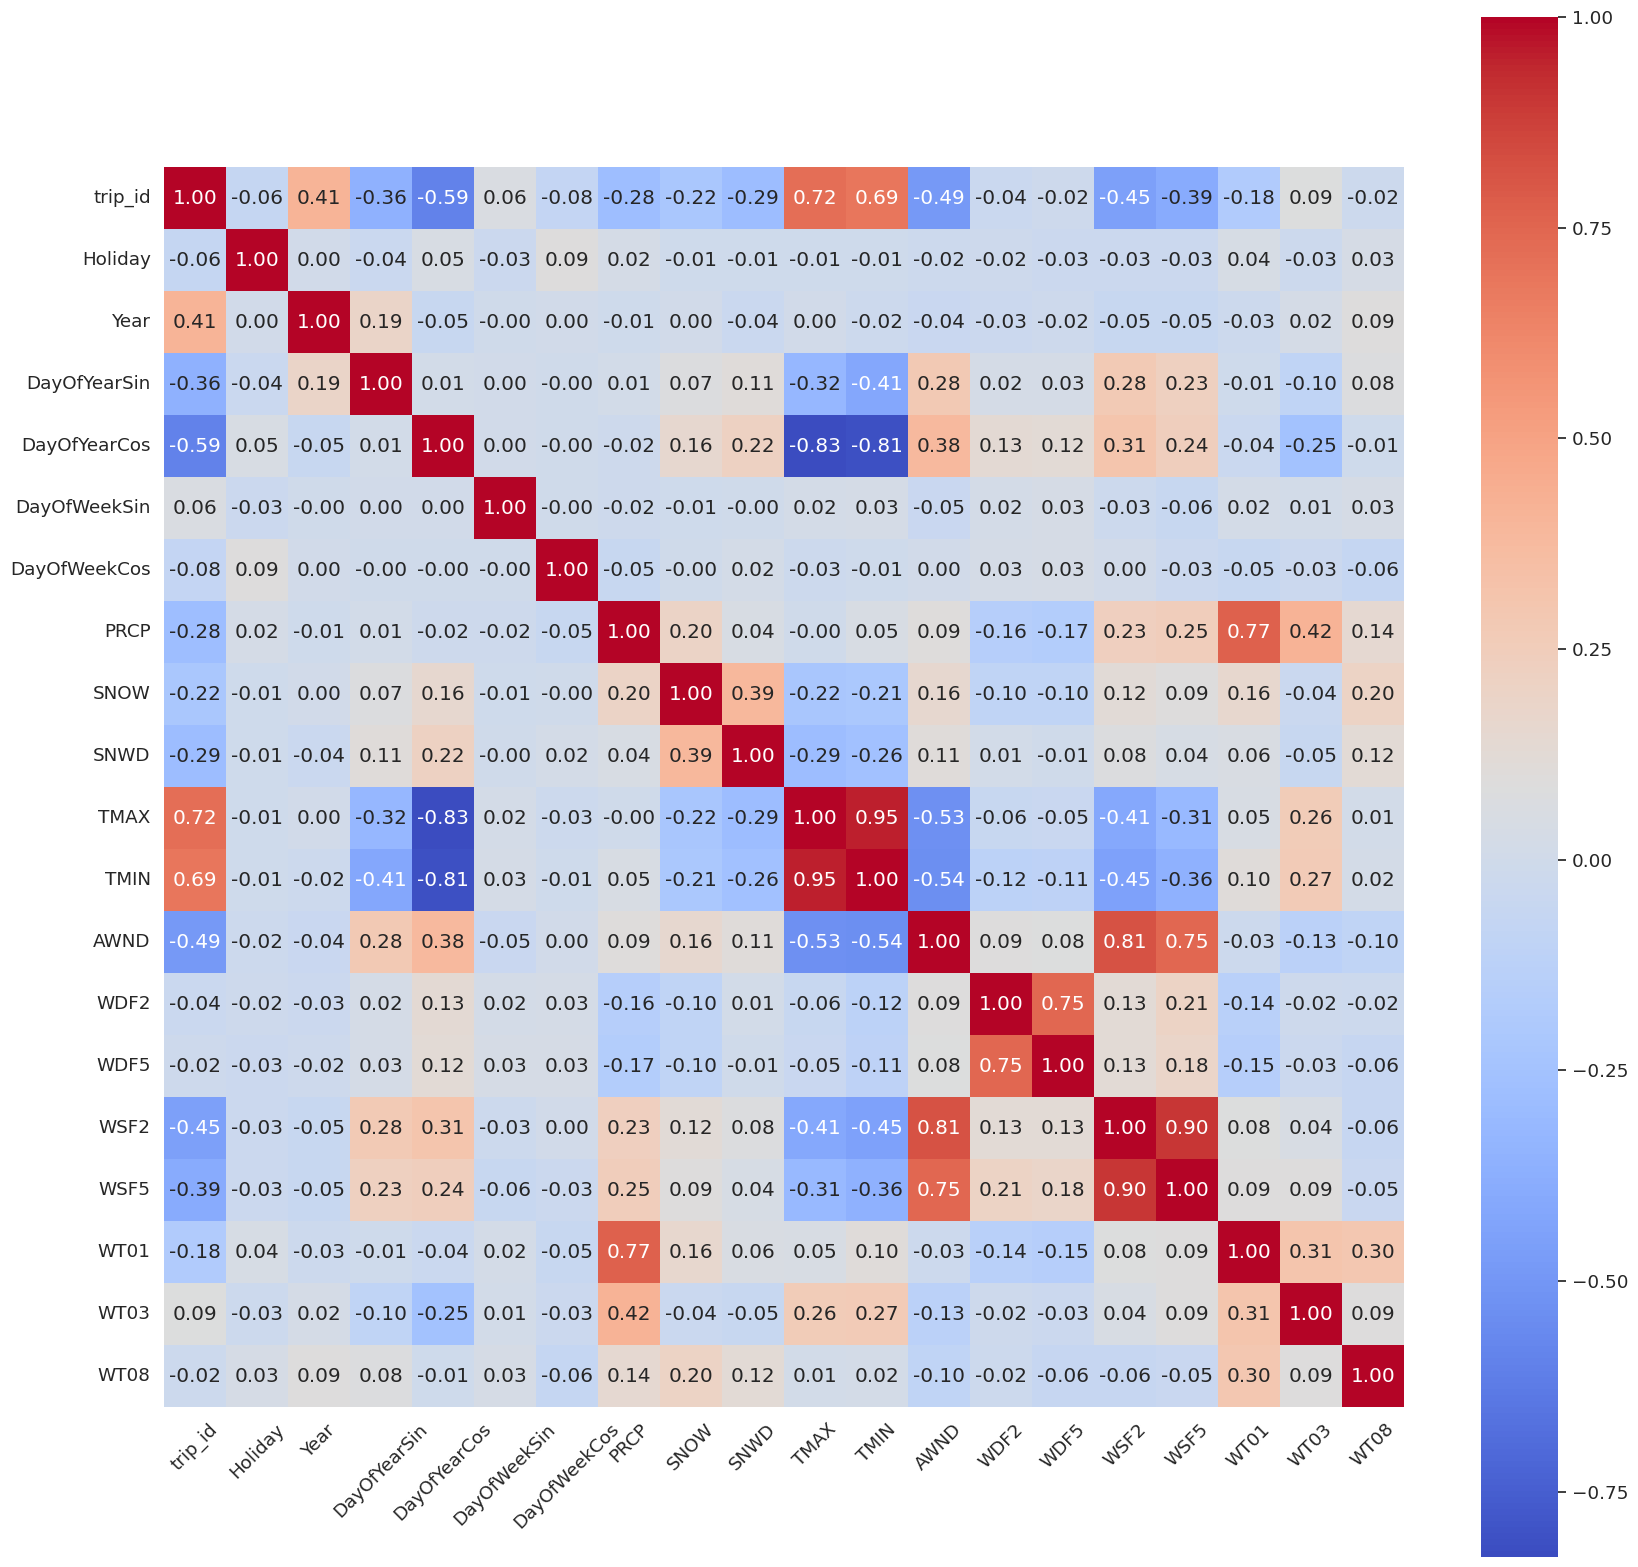

In [ ]:
corr_data_new = new_data.drop(columns = ['DATE'])
corr_data_new.head()

# correlation matrix
correlation_matrix_new = np.corrcoef(corr_data_new, rowvar=False)
column_names = corr_data_new.columns

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.2)
heatmap_new = sns.heatmap(correlation_matrix_new, annot=True, fmt=".2f", cmap="coolwarm", square=True)

# Customize the x and y tick labels
heatmap_new.set_xticklabels(column_names, rotation=45)
heatmap_new.set_yticklabels(column_names, rotation=0)

plt.show()

Based on the heatmap:

*   TMIN and TMAX have high correlations with DayOfYearCos.
*   TMAX and TMIN have super high correlations.
*   WDF5 has high correlation with WDF2.
*   AWND has high correlations with both WSF2 and WSF5.
*   WT01 has high correlations with PRCP







In [ ]:
save_path = "/content/drive/MyDrive/new_data.csv"
new_data.to_csv(save_path, index=False)

#Full Model with both Calendar and Weather Data

In [ ]:
# perform current full model
# Step 1: Linear Regression
X_new = new_data.drop(columns = ['trip_id', 'DATE'])
y_new = aggregated_data['trip_id']

# scaler data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_new_standard = scaler.fit_transform(X_new)

# Split data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new_standard, y_new, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_new, y_train_new)

# Predict on the test set
y_pred_new = model.predict(X_test_new)

# Calculate Mean Squared Error
mse_new = mean_squared_error(y_test_new, y_pred_new)
print(f'Mean Squared Error: {mse_new}')

from sklearn.metrics import r2_score

# Calculate R-squared
r_squared_new = r2_score(y_test_new, y_pred_new)

print(f'R-squared: {r_squared_new}')

Mean Squared Error: 178595745.7737458
R-squared: 0.8371129592710629


In [ ]:
X_new

,Holiday,Year,DayOfYearSin,DayOfYearCos,DayOfWeekSin,DayOfWeekCos,PRCP,SNOW,SNWD,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT03,WT08
0,1,2020,0.017213,0.999852,0.974928,-0.222521,0.000000,0.0,0.0,50,11,38.0,270.0,260.0,76.0,130.0,0.0,0.0,0.0
1,0,2020,0.034422,0.999407,0.433884,-0.900969,0.000000,0.0,0.0,94,6,24.0,230.0,220.0,58.0,98.0,0.0,0.0,0.0
2,0,2020,0.051620,0.998667,-0.433884,-0.900969,3.663562,0.0,0.0,94,67,15.0,250.0,230.0,45.0,67.0,1.0,0.0,1.0
3,0,2020,0.068802,0.997630,-0.974928,-0.222521,4.248495,0.0,0.0,106,50,20.0,300.0,330.0,67.0,107.0,1.0,0.0,0.0
4,0,2020,0.085965,0.996298,-0.781831,0.623490,0.000000,0.0,0.0,56,17,51.0,300.0,300.0,112.0,192.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,0,2023,-0.425000,-0.905193,0.433884,-0.900969,3.663562,0.0,0.0,333,239,22.0,230.0,240.0,63.0,116.0,1.0,1.0,0.0
1304,0,2023,-0.440519,-0.897743,-0.433884,-0.900969,0.000000,0.0,0.0,333,239,11.0,240.0,230.0,54.0,107.0,1.0,1.0,0.0
1305,0,2023,-0.455907,-0.890028,-0.974928,-0.222521,2.772589,0.0,0.0,317,211,23.0,280.0,290.0,67.0,121.0,0.0,1.0,1.0
1306,0,2023,-0.471160,-0.882048,-0.781831,0.623490,0.000000,0.0,0.0,267,189,21.0,300.0,300.0,58.0,85.0,0.0,0.0,0.0


In [ ]:
# show p-value

x_new = sm.add_constant(X_new_standard)
result_new = sm.OLS(y_new, x_new).fit()

print(result_new.summary())

                            OLS Regression Results                            
Dep. Variable:                trip_id   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     343.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:09:21   Log-Likelihood:                -14305.
No. Observations:                1308   AIC:                         2.865e+04
Df Residuals:                    1288   BIC:                         2.875e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.449e+04    378.856    196.615      0.0

The p-values of the variables are larger than 0.05:
PRCP, TMAX, AWND, WDF2, WT01, WT03, WT08

In [ ]:
# perform best subset selection on minitab

Based on the minitab, the variables applied into the model are PRCP, SNOW, SNWD, TMAX, AWND, WSF2, WSF5 and WT08.

#Model After Best Subset Selection

In [ ]:
# Step 1: Linear Regression
X_new2 = new_data.drop(columns = ['trip_id', 'DATE', 'SNOW', 'AWND', 'WDF2', 'WDF5', 'WSF2', 'WT01', 'WT03', 'WT08', 'TMIN'])
y_new2 = new_data['trip_id']

# scaler data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_new2_standard = scaler.fit_transform(X_new2)

# Split data into training and testing sets
X_train_new2, X_test_new2, y_train_new2, y_test_new2 = train_test_split(X_new2_standard, y_new2, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_new2, y_train_new2)

# Predict on the test set
y_pred_new2 = model.predict(X_test_new2)

# Calculate Mean Squared Error
mse_new2 = mean_squared_error(y_test_new2, y_pred_new2)
print(f'Mean Squared Error: {mse_new2}')

from sklearn.metrics import r2_score

# Calculate R-squared
r_squared_new2 = r2_score(y_test_new2, y_pred_new2)

print(f'R-squared: {r_squared_new2}')

Mean Squared Error: 180487220.7504626
R-squared: 0.8353878523250075


In [ ]:
X_new2

,Holiday,Year,DayOfYearSin,DayOfYearCos,DayOfWeekSin,DayOfWeekCos,PRCP,SNWD,TMAX,WSF5
0,1,2020,0.017213,0.999852,0.974928,-0.222521,0.000000,0.0,50,130.0
1,0,2020,0.034422,0.999407,0.433884,-0.900969,0.000000,0.0,94,98.0
2,0,2020,0.051620,0.998667,-0.433884,-0.900969,3.663562,0.0,94,67.0
3,0,2020,0.068802,0.997630,-0.974928,-0.222521,4.248495,0.0,106,107.0
4,0,2020,0.085965,0.996298,-0.781831,0.623490,0.000000,0.0,56,192.0
...,...,...,...,...,...,...,...,...,...,...
1303,0,2023,-0.425000,-0.905193,0.433884,-0.900969,3.663562,0.0,333,116.0
1304,0,2023,-0.440519,-0.897743,-0.433884,-0.900969,0.000000,0.0,333,107.0
1305,0,2023,-0.455907,-0.890028,-0.974928,-0.222521,2.772589,0.0,317,121.0
1306,0,2023,-0.471160,-0.882048,-0.781831,0.623490,0.000000,0.0,267,85.0


In [ ]:
# show p-value

x_new2 = sm.add_constant(X_new2_standard)
result_new2 = sm.OLS(y_new2, x_new2).fit()

print(result_new2.summary())

                            OLS Regression Results                            
Dep. Variable:                trip_id   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     647.9
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:09:21   Log-Likelihood:                -14313.
No. Observations:                1308   AIC:                         2.865e+04
Df Residuals:                    1297   BIC:                         2.870e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.449e+04    379.823    196.115      0.0

In [ ]:
y_pred_new2 = model.predict(X_new2_standard)

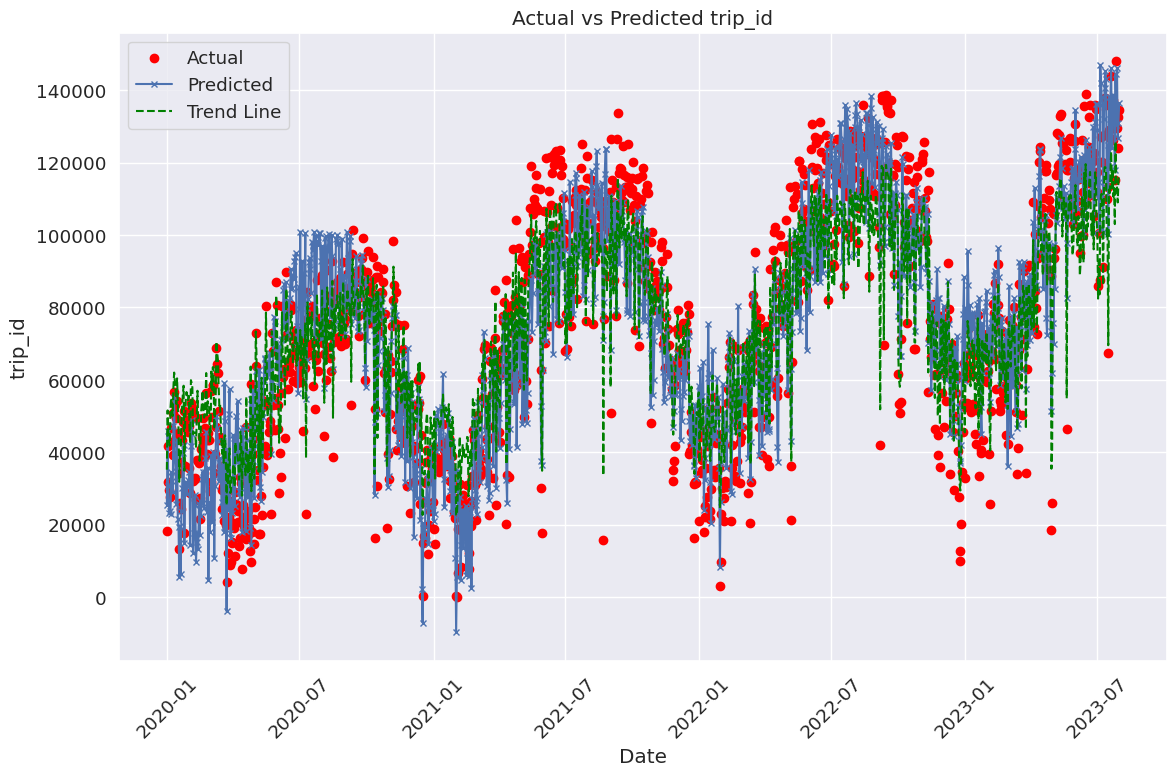

In [ ]:
# Fit linear regression to actual and predicted values
reg_drop = LinearRegression()
reg_drop.fit(y_new2.values.reshape(-1, 1), y_pred_new2)

# Generate trend line values
trend_line_new2 = reg.predict(y_new2.values.reshape(-1, 1))
dates = aggregated_data['DATE']
# Plot the data with trend line
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
plt.scatter(dates, y_new2, label='Actual', color = "red")
plt.plot(dates, y_pred_new2, label='Predicted', marker='x', markersize=4)
plt.plot(dates, trend_line_new2, label='Trend Line', linestyle='--', color='green')
plt.grid(True)

# Add title and labels
plt.title('Actual vs Predicted trip_id')
plt.xlabel('Date')
plt.ylabel('trip_id')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

#Polynomial regression

In [ ]:
X_train_new2.shape

(1046, 10)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)

X_train_poly = poly_features.fit_transform(X_train_new2)
print(X_train_poly.shape)

(1046, 66)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)

  # transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train_new2)

  # fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_new2)



  # predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

  # predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test_new2))

  # evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train_new2, y_train_predicted))
r2_train = r2_score(y_train_new2, y_train_predicted)

  # evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test_new2, y_test_predict))
r2_test = r2_score(y_test_new2, y_test_predict)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 10582.881615413207
R2 score of training set is 0.9007142943148094


The model performance for the test set
-------------------------------------------
RMSE of test set is 10826.163078042304
R2 score of test set is 0.8931032372886453


In [ ]:
# predict all the data
y_pred2 = poly_model.predict(poly_features.fit_transform(X_new2_standard))

# Fit linear regression to actual and predicted values
reg2 = LinearRegression()
reg2.fit(y_new2.values.reshape(-1, 1), y_pred2)

# Generate trend line values
trend_line2 = reg2.predict(y_new2.values.reshape(-1, 1))
dates = new_data['DATE']

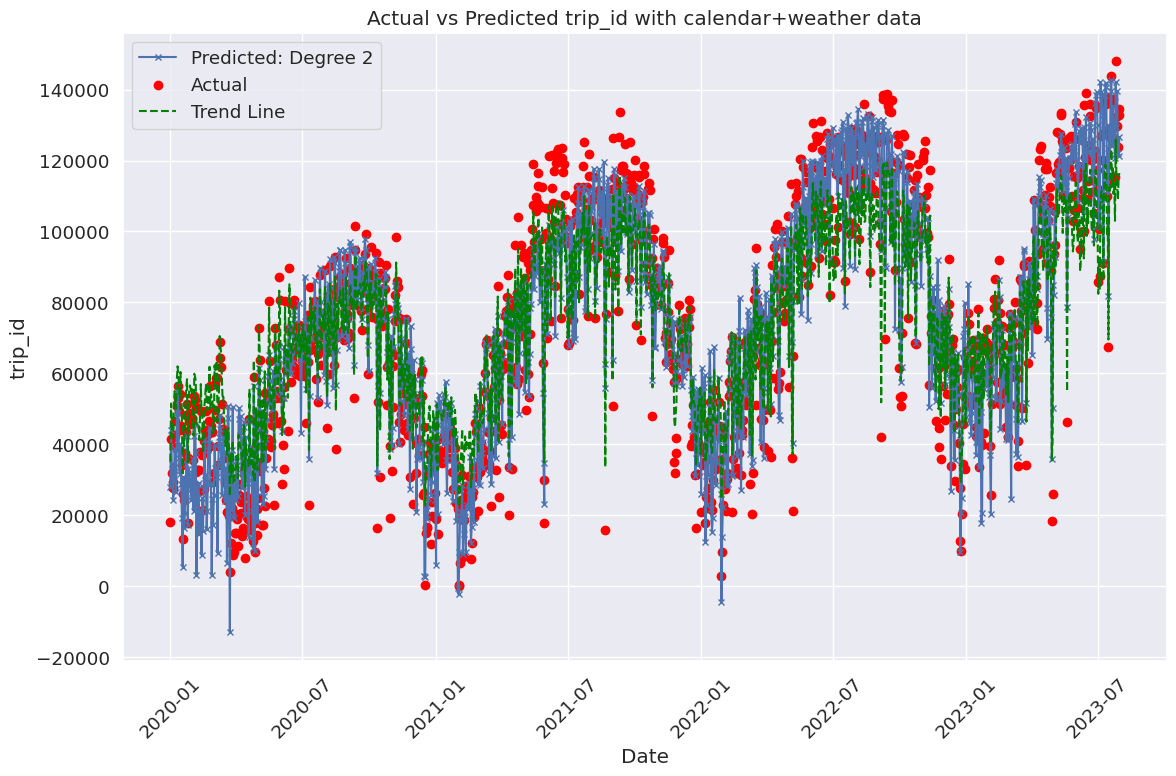

In [ ]:
# Plot the data with trend line
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)

plt.plot(dates, y_pred2, label='Predicted: Degree 2', marker='x', markersize=4)
plt.scatter(dates, y_new2, label='Actual', color = "red")
plt.plot(dates, trend_line, label='Trend Line', linestyle='--', color='green')

plt.grid(True)

# Add title and labels
plt.title('Actual vs Predicted trip_id with calendar+weather data')
plt.xlabel('Date')
plt.ylabel('trip_id')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# show p-value

x_new3 = sm.add_constant(poly_features.fit_transform(X_new2_standard))
result_new3 = sm.OLS(y_new2, x_new3).fit()

print(result_new3.summary())

                            OLS Regression Results                            
Dep. Variable:                trip_id   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     181.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:09:23   Log-Likelihood:                -13977.
No. Observations:                1308   AIC:                         2.808e+04
Df Residuals:                    1245   BIC:                         2.841e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.675e+04    251.823     66.501      0.0

Reasons of the high p-values for certain variables:

1.   No Evidence of Non-Linearity
2.   Overfitting
3.   Collinearity

Approaches:

1.   Evaluate the necessity of the polynomial terms. If there is no clear non-linearity, consider simplifying the model by removing higher-degree terms.

2.  Check for multicollinearity among predictors and consider addressing it.
3. Ensure that you have a sufficient sample size to detect significant effects.
4. Explore other model specifications or transformations that may better represent the data.




#Ridge/Lasso

In [ ]:
# perform ridge on the polynomial regression
from sklearn.linear_model import Ridge
scores_ridge = []
alpha_range = [0.1, 1.0, 10.0, 100.0, 1000.0]
for alpha in alpha_range:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train_poly, y_train_new2)
    y_pred = ridge.predict(poly_features.fit_transform(X_test_new2))
    scores_ridge.append(ridge.score(poly_features.fit_transform(X_test_new2), y_test_new2))

In [ ]:
print(f'alpha_ridge: {alpha_range[scores_ridge.index(max(scores_ridge))]}')
print(f'R-squared: {max(scores_ridge)}')

In [ ]:
# perform lasso on the simple linear regression
from sklearn.linear_model import Lasso
scores_lasso = []
for alpha in alpha_range:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train_poly, y_train_new2)
    y_pred = lasso.predict(poly_features.fit_transform(X_test_new2))
    scores_lasso.append(lasso.score(poly_features.fit_transform(X_test_new2), y_test_new2))

In [ ]:
print(f'alpha_lasso: {alpha_range[scores_lasso.index(max(scores_lasso))]}')
print(f'R-squared: {max(scores_lasso)}')

Both Ridge and Lasso don't effectively improve the R-squared.